In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('health_fitness_dataset.csv')

print(df.head())

print(df.describe())

   person_id  age  weight_kg  height_cm  steps_per_day  calories_burned
0        301   18      52.99     173.99           3000             2075
1        302   33      70.89     192.65          12840             2796
2        303   19      57.21     186.68           9229             2102
3        304   46      71.40     192.25          14381             1764
4        305   20      92.28     180.18           6638             2788
        person_id        age  weight_kg   height_cm  steps_per_day  \
count   30.000000  30.000000  30.000000   30.000000      30.000000   
mean   315.500000  39.133333  75.282333  173.833000    8973.966667   
std      8.803408  14.778207  13.803452   13.772684    3619.636203   
min    301.000000  18.000000  52.990000  152.130000    3000.000000   
25%    308.250000  27.250000  66.145000  163.252500    6218.750000   
50%    315.500000  37.500000  74.195000  172.660000    8860.500000   
75%    322.750000  52.500000  87.042500  185.055000   12262.250000   
max    3

In [3]:
desc_stats = df.describe()
print(desc_stats)
print("------------------------\n")

age_count = df['age'].value_counts()
print(age_count)

print("------------------------\n")
print(df)

        person_id        age  weight_kg   height_cm  steps_per_day  \
count   30.000000  30.000000  30.000000   30.000000      30.000000   
mean   315.500000  39.133333  75.282333  173.833000    8973.966667   
std      8.803408  14.778207  13.803452   13.772684    3619.636203   
min    301.000000  18.000000  52.990000  152.130000    3000.000000   
25%    308.250000  27.250000  66.145000  163.252500    6218.750000   
50%    315.500000  37.500000  74.195000  172.660000    8860.500000   
75%    322.750000  52.500000  87.042500  185.055000   12262.250000   
max    330.000000  62.000000  99.630000  199.540000   14839.000000   

       calories_burned  
count        30.000000  
mean       2379.800000  
std         486.005066  
min        1670.000000  
25%        1921.000000  
50%        2433.500000  
75%        2785.750000  
max        3126.000000  
------------------------

age
18    2
62    2
37    2
27    2
28    2
53    2
61    2
41    1
56    1
20    1
46    1
19    1
33    1
29    1
44

In [4]:
# making a function to cut age into bins
def age_cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >=0) & (x<20):
            bins[idx] = 1
        elif (x >= 21) & (x<30):
            bins[idx] = 2
        elif (x >= 31) & (x<40):
            bins[idx] = 3
        elif (x >= 41) & (x<50):
            bins[idx] = 4
        elif (x >= 51) & (x<60):
            bins[idx] = 5
        else: 
            bins[idx] = 6
    return bins

# makes a numeric column of binned ages
binned_ages_numeric = age_cut(df['age'].to_numpy())
df.insert(6, "binned_ages_numeric", binned_ages_numeric)


# prepares converting numeric binned ages to categorical
conversion_dict = {1: '0 to 20',
                   2: '21 to 30',
                   3: '31 to 40',
                   4: '41 to 50',
                   5: '51 to 60',
                   6: '61+'}
age_order = ['0 to 20', '21 to 30', '31 to 40', '41 to 50', '51 to 60', '61+']

# converts numeric bins to categorical bins
binned_ages_categorical = list(map(conversion_dict.get, binned_ages_numeric))
df.insert(7, "binned_ages_categorical", binned_ages_categorical)

# reorders categorical bins to make sense in legend
df['binned_ages_categorical'] = pd.Categorical(df['binned_ages_categorical'], categories=age_order, ordered=True)

# creating palette for scatterplot
palette = {'0 to 20':'blue',
            '21 to 30':'green',
            '31 to 40':'yellow',
            '41 to 50':'orange',
            '51 to 60':'red',
            '61+':'darkred'}

print(df)

    person_id  age  weight_kg  height_cm  steps_per_day  calories_burned  \
0         301   18      52.99     173.99           3000             2075   
1         302   33      70.89     192.65          12840             2796   
2         303   19      57.21     186.68           9229             2102   
3         304   46      71.40     192.25          14381             1764   
4         305   20      92.28     180.18           6638             2788   
5         306   56      88.11     177.46          11447             3081   
6         307   41      85.46     167.24           6079             2041   
7         308   29      99.63     163.65          12525             2624   
8         309   44      57.14     170.02           8059             1759   
9         310   53      97.05     173.09           3228             2478   
10        311   61      89.95     155.98          12794             1712   
11        312   31      65.53     152.13          14839             2298   
12        31

    person_id  age  weight_kg  height_cm  steps_per_day  calories_burned  \
0         301   18      52.99     173.99           3000             2075   
1         302   33      70.89     192.65          12840             2796   
2         303   19      57.21     186.68           9229             2102   
3         304   46      71.40     192.25          14381             1764   
4         305   20      92.28     180.18           6638             2788   
5         306   56      88.11     177.46          11447             3081   
6         307   41      85.46     167.24           6079             2041   
7         308   29      99.63     163.65          12525             2624   
8         309   44      57.14     170.02           8059             1759   
9         310   53      97.05     173.09           3228             2478   
10        311   61      89.95     155.98          12794             1712   
11        312   31      65.53     152.13          14839             2298   
12        31

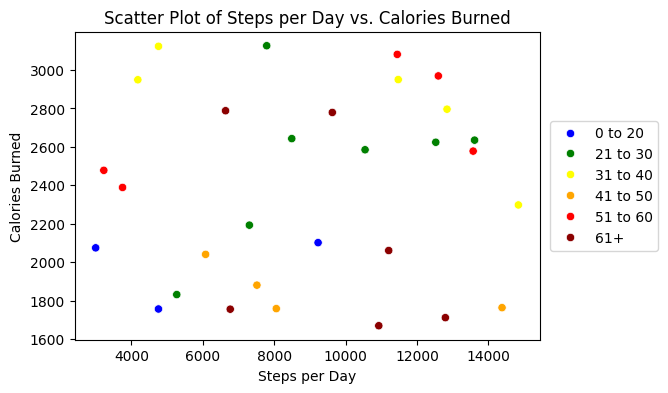

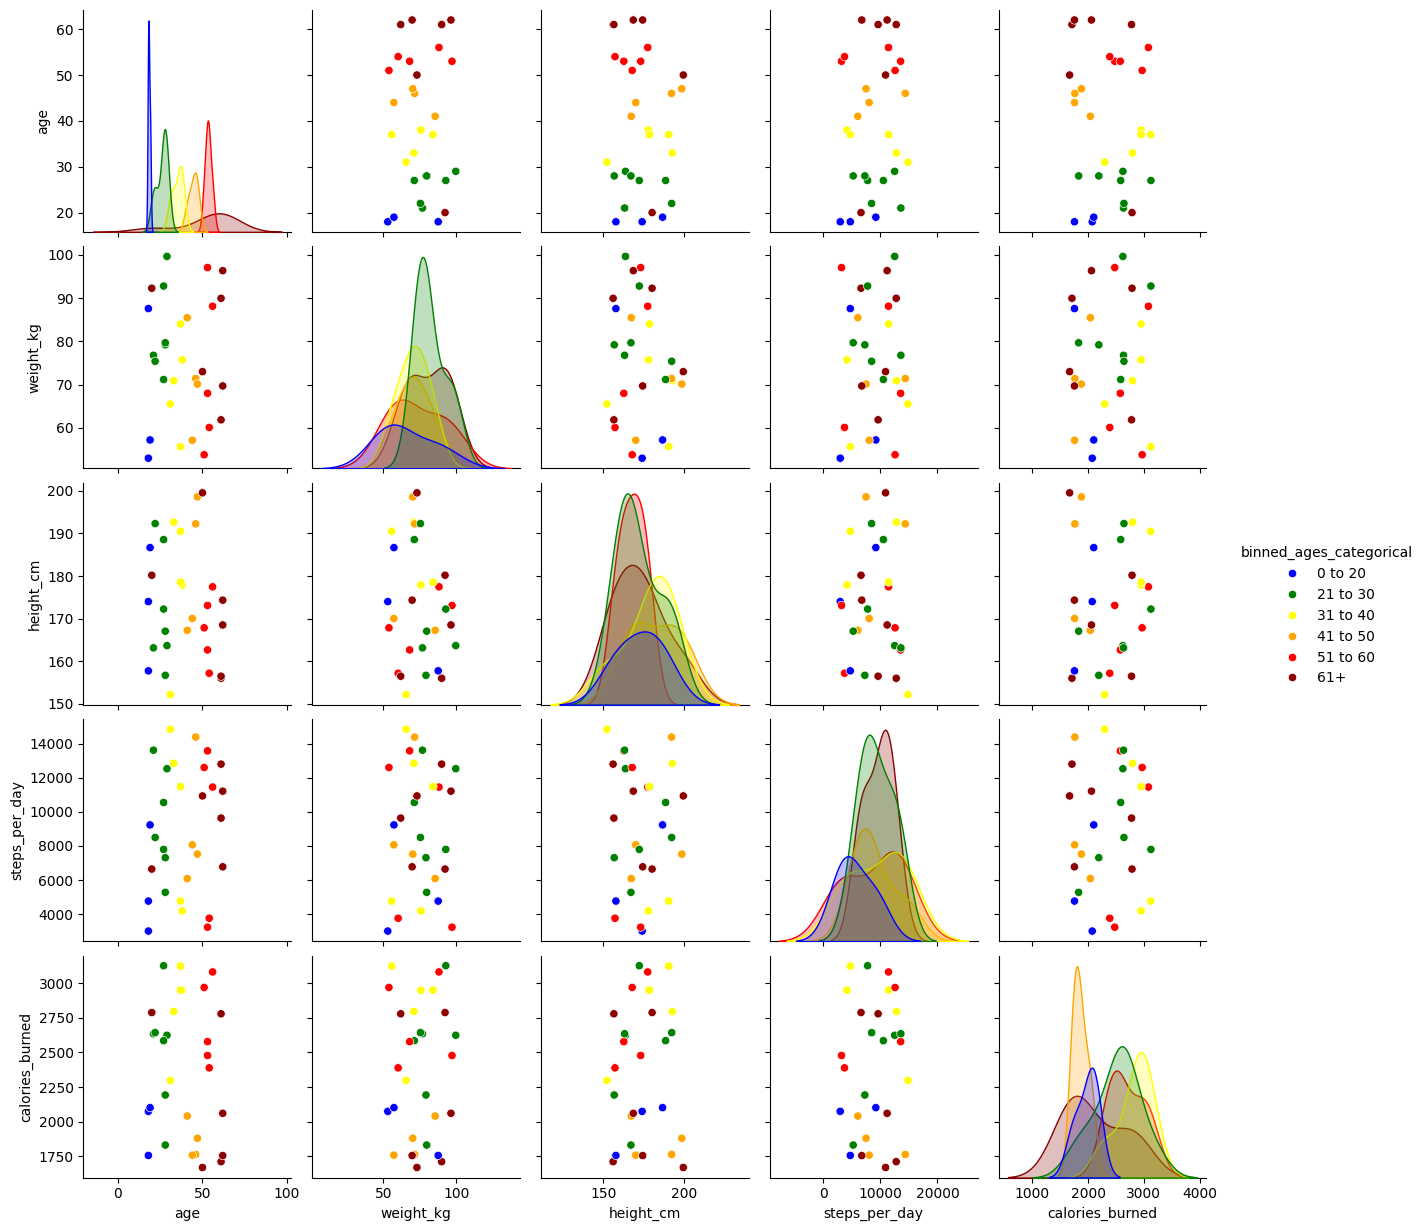

In [5]:
print(df)

# creating scatterplot of steps per day vs. calories burned
plt.figure(figsize=(6,4))
sns.scatterplot(x='steps_per_day', y='calories_burned', hue ='binned_ages_categorical', palette=palette, data=df).get_figure()
plt.legend(loc='center right', bbox_to_anchor=(1.27,0.5))
plt.title('Scatter Plot of Steps per Day vs. Calories Burned')
plt.xlabel('Steps per Day')
plt.ylabel('Calories Burned')
plt.savefig('scatterplot.pdf', pad_inches=5)
plt.show()


# create a pairplot, first dropping unnecessary columns
df.drop(columns=['person_id', 'binned_ages_numeric'], inplace=True)
sns.pairplot(df, hue='binned_ages_categorical', palette=palette)
plt.savefig('pairplot.png')
plt.show()